# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Kamaludin Khoir
- **Email:** khoirkamaludin@gmail.com
- **ID Dicoding:** blessseeker

## Menentukan Pertanyaan Bisnis

- Berapa time range paling efektif untuk menentukan jam buka di hari kerja & hari libur berdasarkan jumlah pemesanan?
- Berapa perbandingan performa pemesanan yang dilakukan oleh casual users dengan registered users selama 5 bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
bike_rents_per_hour_df = pd.read_csv('hour.csv')
bike_rents_per_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [3]:
bike_rents_per_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
bike_rents_per_hour_df.duplicated().sum()

0

In [5]:
bike_rents_per_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
# Result
# - Terdapat invalid data type pada tabel bike_rents_per_hour_df.dteday yang seharusnya datetime menjadi object

### Cleaning Data

In [7]:
bike_rents_per_hour_df['dteday'] = pd.to_datetime(bike_rents_per_hour_df['dteday'])

In [8]:
bike_rents_per_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
'''
# Step untuk menemukan jam buka efektif di working day
1. Seleksi hanya working day
2. Seleksi hanya jam memungkinkan untuk buka toko (05:00 s/d 22:00)
3. Bagi menjadi time range per 8 jam (05 s/d 13, 06, s/d 14, 07 s/d 15, 08 s/d 16, 09 s/d 17, 10 s/d 18, 11 s/d 19, 12 s/d 20, 13 s/d 21, 14 s/d 22)
4. Urutkan berdasarkan pemesanan terbanyak
# Step untuk menemukan jam buka efektif di holiday
1. Seleksi hanya holiday
2. Seleksi hanya jam memungkinkan untuk buka toko (05:00 s/d 22:00)
3. Bagi menjadi time range per 8 jam (05 s/d 13, 06 s/d 14, 07 s/d 15, 08 s/d 16, 09 s/d 17, 10 s/d 18, 11 s/d 19, 12 s/d 20, 13 s/d 21, 14 s/d 22)
4. Urutkan berdasarkan pemesanan terbanyak
# Step untuk mendapatkan tren jumlah pemesanan casual users selama 5 bulan terakhir
1. Seleksi hanya pemesanan casual users dalam 5 bulan terakhir
2. Bagi menjadi pemesanan per bulan
# Step untuk mendapatkan tren jumlah pemesanan registered users selama 5 bulan terakhir
1. Seleksi hanya pemesanan registered users dalam 5 bulan terakhir
2. Bagi menjadi pemesanan per bulan

'''

'\n# Step untuk menemukan jam buka efektif di working day\n1. Seleksi hanya working day\n2. Seleksi hanya jam memungkinkan untuk buka toko (05:00 s/d 22:00)\n3. Bagi menjadi time range per 8 jam (05 s/d 13, 06, s/d 14, 07 s/d 15, 08 s/d 16, 09 s/d 17, 10 s/d 18, 11 s/d 19, 12 s/d 20, 13 s/d 21, 14 s/d 22)\n4. Urutkan berdasarkan pemesanan terbanyak\n# Step untuk menemukan jam buka efektif di holiday\n1. Seleksi hanya holiday\n2. Seleksi hanya jam memungkinkan untuk buka toko (05:00 s/d 22:00)\n3. Bagi menjadi time range per 8 jam (05 s/d 13, 06 s/d 14, 07 s/d 15, 08 s/d 16, 09 s/d 17, 10 s/d 18, 11 s/d 19, 12 s/d 20, 13 s/d 21, 14 s/d 22)\n4. Urutkan berdasarkan pemesanan terbanyak\n# Step untuk mendapatkan tren jumlah pemesanan casual users selama 5 bulan terakhir\n1. Seleksi hanya pemesanan casual users dalam 5 bulan terakhir\n2. Bagi menjadi pemesanan per bulan\n# Step untuk mendapatkan tren jumlah pemesanan registered users selama 5 bulan terakhir\n1. Seleksi hanya pemesanan regist

In [10]:
# 1: Seleksi hanya workingday
working_day_df = bike_rents_per_hour_df[bike_rents_per_hour_df['workingday'] == 1]

# 2: Seleksi hanya jam memungkinkan untuk buka toko (05:00 s/d 22:00)
opening_hours_wd_df = working_day_df[(working_day_df['hr'] >= 5) & (working_day_df['hr'] <= 22)]

# 3: Bagi menjadi time range per 8 jam
time_ranges = {
    '05-13': (5, 13),
    '06-14': (6, 14),
    '07-15': (7, 15),
    '08-16': (8, 16),
    '09-17': (9, 17),
    '10-18': (10, 18),
    '11-19': (11, 19),
    '12-20': (12, 20),
    '13-21': (13, 21),
    '14-22': (14, 22)
}

time_range_wd_dfs = {}
for range_name, (start_hour, end_hour) in time_ranges.items():
    range_df = opening_hours_wd_df[(opening_hours_wd_df['hr'] >= start_hour) & (opening_hours_wd_df['hr'] <= end_hour)]
    if not range_df.empty:  # Check if the DataFrame is not empty
        time_range_wd_dfs[range_name] = range_df

# 4: Urutkan berdasarkan pemesanan terbanyak
sorted_wd_df = sorted(time_range_wd_dfs.items(), key=lambda x: x[1]['cnt'].sum(), reverse=True)

# Menampilkan DataFrame yang diurutkan
print("Urutan jam operasi toko paling efektif berdasarkan jumlah rental (working day):")
for range_name, range_df in sorted_wd_df:
    print(f"Time Range: {range_name}, Order Counts: {range_df['cnt'].sum()}")

Urutan jam operasi toko paling efektif berdasarkan jumlah rental (working day):
Time Range: 12-20, Order Counts: 1341689
Time Range: 13-21, Order Counts: 1334652
Time Range: 14-22, Order Counts: 1304752
Time Range: 11-19, Order Counts: 1295811
Time Range: 10-18, Order Counts: 1189449
Time Range: 09-17, Order Counts: 1064113
Time Range: 08-16, Order Counts: 1038588
Time Range: 07-15, Order Counts: 1036464
Time Range: 06-14, Order Counts: 987041
Time Range: 05-13, Order Counts: 907954


In [29]:
# 1: Seleksi hanya holiday
holiday_df = bike_rents_per_hour_df[bike_rents_per_hour_df['holiday'] == 1]

# 2: Seleksi hanya jam memungkinkan untuk buka toko (05:00 s/d 22:00)
opening_hours_hd_df = holiday_df[(holiday_df['hr'] >= 5) & (holiday_df['hr'] <= 22)]


# 3: Bagi menjadi time range per 8 jam
time_ranges = {
    '05-13': (5, 13),
    '06-14': (6, 14),
    '07-15': (7, 15),
    '08-16': (8, 16),
    '09-17': (9, 17),
    '10-18': (10, 18),
    '11-19': (11, 19),
    '12-20': (12, 20),
    '13-21': (13, 21),
    '14-22': (14, 22)
}

time_range_hd_dfs = {}
for range_name, (start_hour, end_hour) in time_ranges.items():
    range_df = opening_hours_hd_df[(opening_hours_hd_df['hr'] >= start_hour) & (opening_hours_hd_df['hr'] <= end_hour)]
    if not range_df.empty:  # Check if the DataFrame is not empty
        time_range_hd_dfs[range_name] = range_df

# 4: Urutkan berdasarkan pemesanan terbanyak
sorted_hd_df = sorted(time_range_hd_dfs.items(), key=lambda x: x[1]['cnt'].sum(), reverse=True)

# Menampilkan DataFrame yang diurutkan
print("Urutan jam operasi toko paling efektif berdasarkan jumlah rental (holiday):")
for range_name, range_df in sorted_hd_df:
    print(f"Time Range: {range_name}, Order Counts: {range_df['cnt'].sum()}")

Urutan jam operasi toko paling efektif berdasarkan jumlah rental (holiday):
Time Range: 11-19, Order Counts: 51273
Time Range: 10-18, Order Counts: 50889
Time Range: 12-20, Order Counts: 49791
Time Range: 09-17, Order Counts: 48840
Time Range: 13-21, Order Counts: 46808
Time Range: 08-16, Order Counts: 46265
Time Range: 14-22, Order Counts: 42825
Time Range: 07-15, Order Counts: 42272
Time Range: 06-14, Order Counts: 37298
Time Range: 05-13, Order Counts: 31509


In [45]:
# 1. Seleksi hanya pemesanan casual users dalam 5 bulan terakhir
latest_order_date = bike_rents_per_hour_df['dteday'].max()
five_months_ago = latest_order_date - pd.DateOffset(months=5)
recent_bookings = bike_rents_per_hour_df[(bike_rents_per_hour_df['dteday'] > five_months_ago) & (bike_rents_per_hour_df['casual'] > 0)].copy()

# 2. Bagi menjadi pemesanan per bulan
recent_bookings['month'] = recent_bookings['dteday'].dt.strftime('%Y-%m')
casual_monthly_bookings = recent_bookings.groupby('month')['casual'].sum().reset_index()

# Menampilkan hasil
print(casual_monthly_bookings)

     month  casual
0  2012-08   43197
1  2012-09   43778
2  2012-10   34538
3  2012-11   21009
4  2012-12   13245


In [46]:
# 1. Seleksi hanya pemesanan casual users dalam 5 bulan terakhir
latest_order_date = bike_rents_per_hour_df['dteday'].max()
five_months_ago = latest_order_date - pd.DateOffset(months=5)
recent_bookings = bike_rents_per_hour_df[(bike_rents_per_hour_df['dteday'] > five_months_ago) & (bike_rents_per_hour_df['registered'] > 0)].copy()

# 2. Bagi menjadi pemesanan per bulan
recent_bookings['month'] = recent_bookings['dteday'].dt.strftime('%Y-%m')
registered_monthly_bookings = recent_bookings.groupby('month')['registered'].sum().reset_index()

# Menampilkan hasil
print(registered_monthly_bookings)

     month  registered
0  2012-08      171306
1  2012-09      174795
2  2012-10      164303
3  2012-11      131655
4  2012-12      110468


## Visualization & Explanatory Analysis

### Pertanyaan 1:

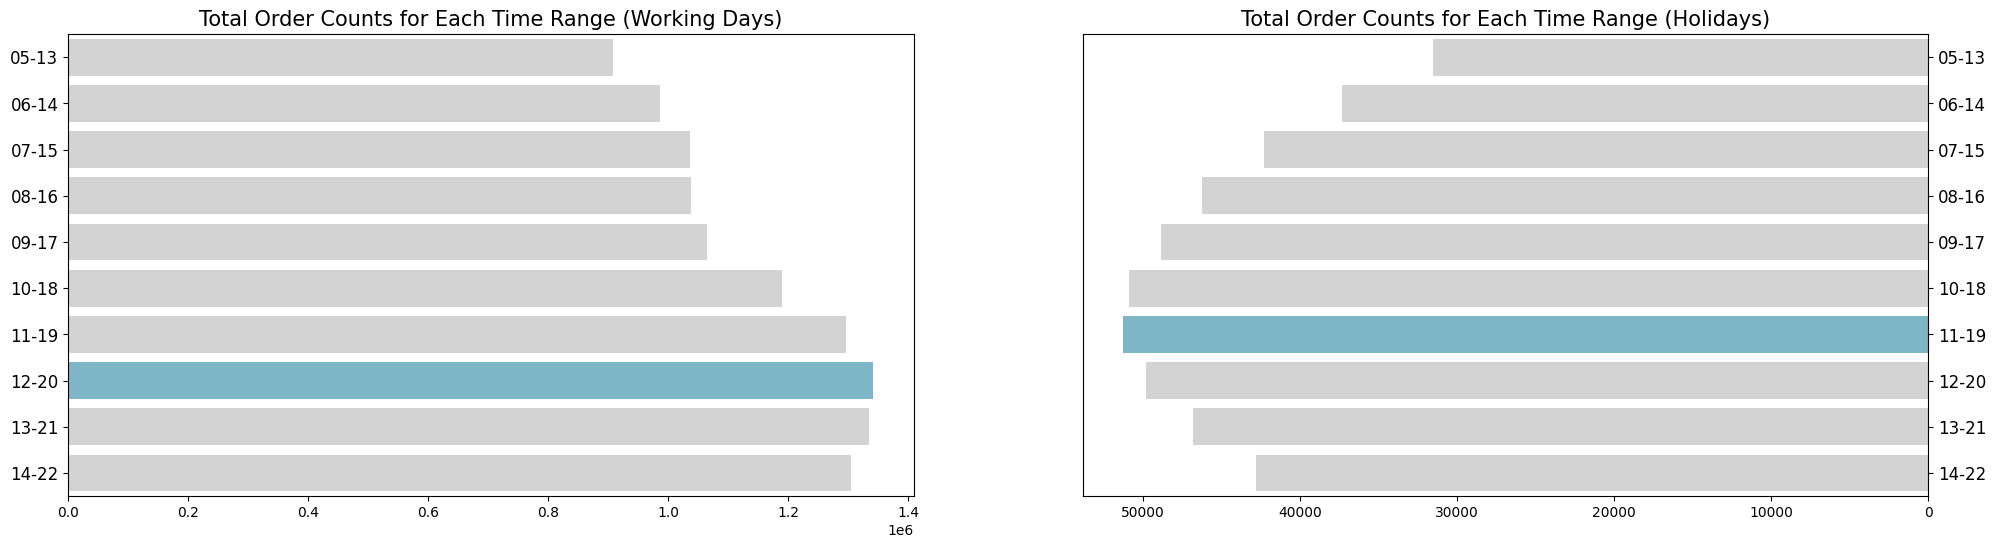

In [42]:
wd_time_ranges = []
wd_order_counts = []

for range_name, range_df in time_range_wd_dfs.items():
    wd_time_ranges.append(range_name)
    wd_order_counts.append(range_df['cnt'].sum())
    
wd_data_df = pd.DataFrame({'Time Range': wd_time_ranges, 'Order Counts': wd_order_counts})

hd_time_ranges = []
hd_order_counts = []

for range_name, range_df in time_range_hd_dfs.items():
    hd_time_ranges.append(range_name)
    hd_order_counts.append(range_df['cnt'].sum())
    
hd_data_df = pd.DataFrame({'Time Range': hd_time_ranges, 'Order Counts': hd_order_counts})   

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
wd_colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x='Order Counts', y='Time Range', data=wd_data_df, palette=wd_colors, ax=ax[0], hue="Time Range")
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Total Order Counts for Each Time Range (Working Days)", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

hd_colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x='Order Counts', y='Time Range', data=hd_data_df, palette=hd_colors, ax=ax[1], hue="Time Range")
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Total Order Counts for Each Time Range (Holidays)", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)


### Pertanyaan 2:

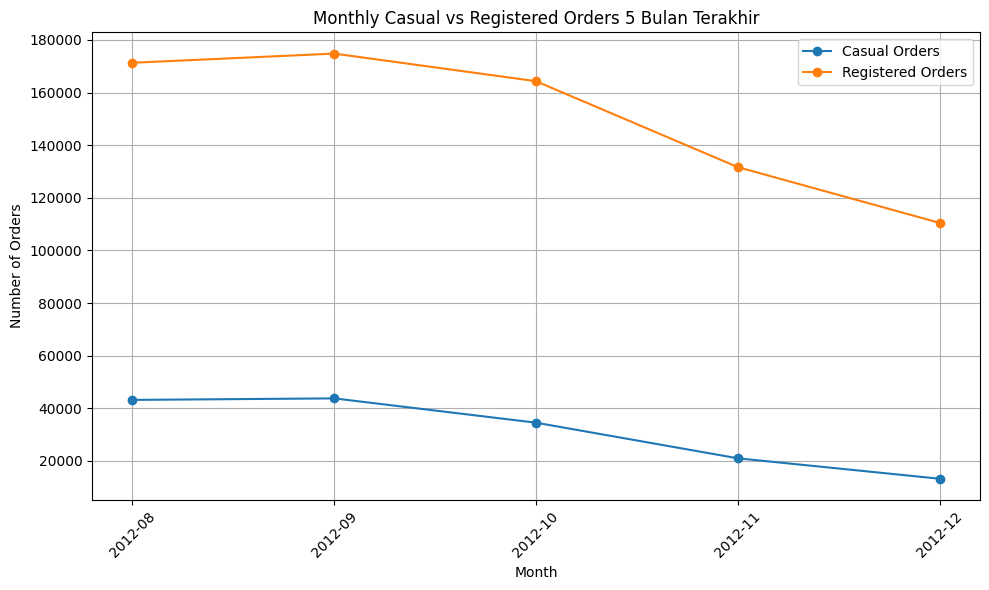

In [49]:
# Plotting the line chart
plt.figure(figsize=(10, 6))

# Plotting casual orders
plt.plot(casual_monthly_bookings['month'], casual_monthly_bookings['casual'], label='Casual Orders', marker='o')

# Plotting registered orders
plt.plot(registered_monthly_bookings['month'], registered_monthly_bookings['registered'], label='Registered Orders', marker='o')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Casual vs Registered Orders 5 Bulan Terakhir')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend

# Display the plot
plt.grid(True)  # Add grid
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Conclusion

- Jika melihat frekuensi pemesanan, waktu yang paling efektif untuk membuka toko adalah pada jarak waktu pukul 12.00 s/d 20.00 pada hari kerja dan 11:00 s/d 19:00 pada hari libur dengan asumsi jam kerja maksimal 8 jam dalam satu hari baik itu working day ataupun holiday
- Registered users melakukan jauh lebih banyak pemesanan dibanding casual users. Hal ini menunjukkan kalau strategi membership berjalan baik. Namun, pada 3 bulan terakhir jarak antara registered orders dengan casual orders semakin terpangkas. Hal ini tidak lepas dari pengaruh jumlah pemesanan secara keseluruhan yang terus menurun.